# Keras neural network - Image Classification problem with Early Stopping
by Adam Lang
* Date: 2/20/2024
* We will demonstrate `early stopping` to reduce overfitting in the neural network.

# Problem Statement
* Classify images of vehicles as emergency or non-emergency (i.e. firetruck, police car vs. regular car)
* Binary classification problem.
* 1 = emergency
* 2 = non-emergency

## Steps to Solve this problem using Keras Neural Network
1. Load dataset
2. Pre-process data
3. Create training and validation sets
4. Define model architecture
5. Compile model
6. Setting up early stopping
7. Train model using Early stopping
8. Evaluate model performance

# 1. Loading dataset

In [11]:
# import standard libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# import adam optimizer from keras
from keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Use git commands in colab to get into folder

In [8]:
ls

 brain_test.hdr
 brain_test.img
 Converting_image_file_formats_with_scikit-image.ipynb
 Converting_images_into_different_formats.ipynb
 Dailog-dataset.dialogs_dataset
 Dataset.zip
 dog.jpg
 Extracting_Edges_from_Images.ipynb
 Extracting_Edges.ipynb
 image_gray.png
 Keras_neural_network_Image_Classification_Problem_with_Early_Stopping.ipynb
 LSTM_Text_Generation_with_Neural_Language_Modeling.ipynb
 mid_alpha.png
'Reading and Stacking Images - Using scikit-image and nibabel.ipynb'
 RGBA_image.png
 someones_epi.nii


In [9]:
# if using code to mount drive use this code block to unzip file
!unzip Dataset.zip



Archive:  Dataset.zip
   creating: Dataset/
  inflating: Dataset/emergency_classification.csv  
   creating: Dataset/images/
  inflating: Dataset/images/0.jpg    
  inflating: Dataset/images/10.jpg   
  inflating: Dataset/images/1002.jpg  
  inflating: Dataset/images/1006.jpg  
  inflating: Dataset/images/1007.jpg  
  inflating: Dataset/images/1009.jpg  
  inflating: Dataset/images/1013.jpg  
  inflating: Dataset/images/1014.jpg  
  inflating: Dataset/images/1016.jpg  
  inflating: Dataset/images/1019.jpg  
  inflating: Dataset/images/102.jpg  
  inflating: Dataset/images/1020.jpg  
  inflating: Dataset/images/1022.jpg  
  inflating: Dataset/images/1023.jpg  
  inflating: Dataset/images/1026.jpg  
  inflating: Dataset/images/1031.jpg  
  inflating: Dataset/images/1035.jpg  
  inflating: Dataset/images/1036.jpg  
  inflating: Dataset/images/1037.jpg  
  inflating: Dataset/images/104.jpg  
  inflating: Dataset/images/1040.jpg  
  inflating: Dataset/images/1041.jpg  
  inflating: Dataset/

In [13]:
## read in dataset below
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning Notebooks/Dataset/emergency_classification.csv')

In [14]:
# create random number generator - this is so our code is reproducible
seed = 42
rng = np.random.RandomState(seed)

In [15]:
# let's look at the head of the data
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [16]:
# lets load the images and use the imread function to read the images

# create empty list to store images
X = []
# iterating over each image
for img_name in data.image_names:
  # loading the image using its name + complete path of image
  img = plt.imread('Dataset/images/' + img_name)
  # saving each image in the list
  X.append(img)

# converting the list of images into array
X=np.array(X)


# storing target variable in separate variable
y = data.emergency_or_not.values

In [17]:
# find shape of images
X.shape

(2352, 224, 224, 3)

summary:
* 2,352 images
* height x weight x channels => 224 x 224 x 3

# 2. Pre-processing the data

In [18]:
# converting 3 dimensional image to 1 dimensional image
# X.shape[0] is the total number of images => 2,352
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

summary: now we have 2,352 images and 1 dim array of 150,528 features

In [19]:
# min and max pixel values of images
X.min(), X.max()

(0, 255)

summary: min pixel value is 0, max pixel values is 255

In [20]:
# normalizing the pixel values to between 0 and 1
X = X / X.max()

In [21]:
# min and max pixel values of images after normalizing
X.min(), X.max()

(0.0, 1.0)

summary: now data is normalized between 0 and 1

# 3. Creating training and validation set
* train the data
* validate the model performance on validation set

In [22]:
# create training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.3, random_state=seed)

In [23]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

summary:
* training set has 1,646 images
* validation set has 706 images

# 4. Defining the model architecture

In [24]:
# defining model architecture
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,))) # number of features for every data point
model.add(Dense(100, activation='sigmoid')) # hidden layer 1
model.add(Dense(100, activation='sigmoid')) # hidden layer 2
model.add(Dense(units=1, activation='sigmoid')) #output layer with 1 neuron (binary classification)

# 5. Compiling the model

In [25]:
# defining the adam optimizer and setting learning rate as 10^-5
adam = Adam(learning_rate=1e-5)

In [26]:
# compiling the model

# defining loss as binary crossentropy (binary classification problem)
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# 6. Setting up Early Stopping

In [27]:
# importing module for early stopping
from keras.callbacks import EarlyStopping

In [28]:
# setting up early stopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5, mode='min')

summary:
* `monitor` is the metric we want to monitor (validation loss)
* `min_delta` is minimum threshold value of 0.01
* `patience` is number of epochs
* `mode` is minimum because we want the minimimal validation loss. If we wante to monitor validation_accuracy we would want `mode` set to max because we want to define the maximum accuracy.


# 7. Training the model using Early Stopping
* callbacks is the function we are applying which is `early_stopping`

In [29]:
# training the model for 100 epochs

# defining the early stopping as callback using callbacks parameter of model.fit
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

Epoch 1/100
13/13 [==============================] - 9s 610ms/step - loss: 0.6948 - accuracy: 0.5838 - val_loss: 0.6855 - val_accuracy: 0.5609
Epoch 2/100
13/13 [==============================] - 9s 720ms/step - loss: 0.6810 - accuracy: 0.5863 - val_loss: 0.6779 - val_accuracy: 0.5609
Epoch 3/100
13/13 [==============================] - 7s 534ms/step - loss: 0.6691 - accuracy: 0.5863 - val_loss: 0.6741 - val_accuracy: 0.5609
Epoch 4/100
13/13 [==============================] - 8s 621ms/step - loss: 0.6585 - accuracy: 0.5863 - val_loss: 0.6600 - val_accuracy: 0.5609
Epoch 5/100
13/13 [==============================] - 8s 629ms/step - loss: 0.6500 - accuracy: 0.5863 - val_loss: 0.6517 - val_accuracy: 0.5609
Epoch 6/100
13/13 [==============================] - 7s 486ms/step - loss: 0.6420 - accuracy: 0.5863 - val_loss: 0.6509 - val_accuracy: 0.5609
Epoch 7/100
13/13 [==============================] - 8s 600ms/step - loss: 0.6344 - accuracy: 0.5863 - val_loss: 0.6402 - val_accuracy: 0.5623

summary:
* The model stopped training at Epoch 26 because the metric we were monitoring `val_loss` did not minimize by 0.01 for at least 5 consecutive epochs.
* Thus we applied the early stopping.

# 8. Evaluating model performance

In [30]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:,0] < 0.5, 0, 1)))

23/23 [==============================] - 1s 40ms/step
Accuracy on validation set: 0.7110481586402266


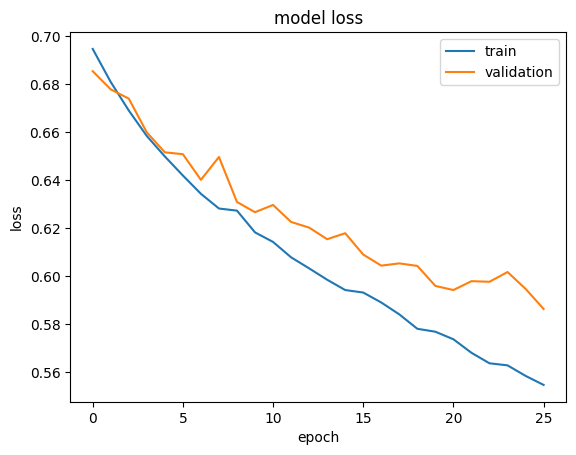

In [31]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

summary:
* With early stopping we were able to stop overfitting as seen by the validation loss metric in the above plot.